🔍 Dataset Overview: Retail Transactions Dataset
The dataset contains 1,000,000 records with 13 features, capturing detailed transaction-level retail data across various dimensions. Below is a breakdown of each column and what it represents:

| **Transaction\_ID**    | Unique ID for each transaction                             |

| **Date**               | Timestamp of the transaction                               |

| **Customer\_Name**     | Name of the customer                                       |

| **Product**            | Product(s) purchased (some in list-like format)            |

| **Total\_Items**       | Number of items purchased in a transaction                 |

| **Total\_Cost**        | Total transaction value in dollars                         |

| **Payment\_Method**    | Mode of payment (e.g., Cash, Card, Online, etc.)           |

| **City**               | City where transaction occurred                            |

| **Store\_Type**        | Type of store (e.g., Supermarket, Mini Market, etc.)       |

| **Discount\_Applied**  | Boolean indicating if discount was applied                 |

| **Customer\_Category** | Category of customer (e.g., Senior Citizen, Student, etc.) |

| **Season**             | Season in which purchase was made (e.g., Summer, Winter)   |

| **Promotion**          | Promotional offer type or "None" if no promotion           |


✅ Action Plan
1. 🧭 Exploratory Data Analysis (EDA)
We will:

Inspect distributions of numerical features (Total_Items, Total_Cost)

Analyze top products, payment methods, and cities

Explore customer category behavior

Check for patterns by season and promotions

Handle any inconsistencies (e.g., malformed products or timestamp parsing)

2. 📊 RFM Analysis (Recency, Frequency, Monetary)
To segment customers based on:

Recency: Days since last purchase

Frequency: Number of transactions by customer

Monetary: Total amount spent by customer

This will help identify:

Loyal customers

High-value, low-frequency shoppers

Customers at risk of churn

3. 🎯 K-Means Clustering
We’ll use the RFM scores to:

Standardize the data

Find the optimal number of clusters (using Elbow Method/Silhouette Score)

Segment customers into groups (e.g., "Champions", "Need Attention", etc.)

These clusters will help define marketing or promotional strategies tailored to each customer group.

In [ ]:
#Importing all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the data
retail = pd.read_csv('/content/Retail_Transactions_Dataset.csv')

In [ ]:
retail

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000999995,2023-03-27 06:12:10,Lisa Gonzalez,"['Pickles', 'Carrots', 'Peanut Butter', 'Spong...",1,22.07,Debit Card,Los Angeles,Supermarket,False,Middle-Aged,Winter,NaN
999996,1000999996,2022-05-19 05:13:58,Emily Graham,['Cereal'],8,80.25,Cash,Houston,Warehouse Club,True,Senior Citizen,Spring,Discount on Selected Items
999997,1000999997,2021-09-03 13:59:39,Cynthia Anderson,['Trash Bags'],3,60.74,Credit Card,Los Angeles,Convenience Store,False,Homemaker,Winter,NaN
999998,1000999998,2023-10-17 05:50:40,Michael Rodriguez,"['Diapers', 'Coffee', 'Coffee', 'Mop']",3,23.48,Debit Card,San Francisco,Supermarket,True,Retiree,Winter,BOGO (Buy One Get One)


In [ ]:
#Checking for any missing values
retail.isnull().sum()

,0
Transaction_ID,0
Date,0
Customer_Name,0
Product,0
Total_Items,0
Total_Cost,0
Payment_Method,0
City,0
Store_Type,0
Discount_Applied,0


In [ ]:
#Understanding the data
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666057 entries, 1 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Transaction_ID     666057 non-null  int64  
 1   Date               666057 non-null  object 
 2   Customer_Name      666057 non-null  object 
 3   Product            666057 non-null  object 
 4   Total_Items        666057 non-null  int64  
 5   Total_Cost         666057 non-null  float64
 6   Payment_Method     666057 non-null  object 
 7   City               666057 non-null  object 
 8   Store_Type         666057 non-null  object 
 9   Discount_Applied   666057 non-null  bool   
 10  Customer_Category  666057 non-null  object 
 11  Season             666057 non-null  object 
 12  Promotion          666057 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 66.7+ MB


In [ ]:
#The Date column is of type object, so we will convert it to datetime using pd.to_datetime.
retail['Date'] = pd.to_datetime(retail['Date'])

<ipython-input-9-2043661749>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Date'] = pd.to_datetime(retail['Date'])


In [ ]:
#Since the Date column is in "%y-%m-%d 00:00:00" format we will convert it to "%y-%m-%d"
retail['date'] = retail['Date'].dt.strftime('%Y-%m-%d')

<ipython-input-10-2955825188>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['date'] = retail['Date'].dt.strftime('%Y-%m-%d')


In [ ]:
retail['date']

,date
1,2023-03-01
4,2020-12-10
5,2021-10-07
6,2023-01-08
7,2020-09-03
...,...
999993,2022-01-02
999994,2021-03-13
999996,2022-05-19
999998,2023-10-17


In [ ]:
retail.drop(columns = ['Date'], axis = 1, inplace= True)

<ipython-input-12-1781763302>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail.drop(columns = ['Date'], axis = 1, inplace= True)


In [ ]:
#We have cutsomer name but we don't have their ID so we will create customer ID column in the data itself.
retail['Customer ID'] = retail['Customer_Name'].astype('category').cat.codes

<ipython-input-13-1841769185>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Customer ID'] = retail['Customer_Name'].astype('category').cat.codes


In [ ]:
retail['Customer ID'].value_counts()

,count
Customer ID,
176889,293
176373,230
107259,219
177041,206
51298,197
...,...
125235,1
79320,1
208203,1


In [ ]:
retail

,Transaction_ID,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,date,Customer ID
1,1000000001,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One),2023-03-01,178197
4,1000000004,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,2020-12-10,236681
5,1000000005,Joshua Frazier,"['Toothpaste', 'Chicken']",3,72.24,Cash,Houston,Supermarket,True,Retiree,Spring,Discount on Selected Items,2021-10-07,128921
6,1000000006,Victoria Garrett,"['Honey', 'BBQ Sauce', 'Soda', 'Olive Oil', 'G...",4,5.28,Cash,Boston,Specialty Store,False,Student,Summer,Discount on Selected Items,2023-01-08,255686
7,1000000007,Sydney Waller,"['Syrup', 'Trash Cans', 'Pancake Mix', 'Water'...",5,21.77,Debit Card,Chicago,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,2020-09-03,237610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,1000999993,Donna Hamilton,"['Laundry Detergent', 'Feminine Hygiene Produc...",6,65.29,Debit Card,Dallas,Specialty Store,True,Student,Summer,BOGO (Buy One Get One),2022-01-02,74087
999994,1000999994,James Villegas,"['Toothbrush', 'Hair Gel', 'Milk']",8,99.12,Cash,Los Angeles,Supermarket,False,Retiree,Summer,BOGO (Buy One Get One),2021-03-13,107347
999996,1000999996,Emily Graham,['Cereal'],8,80.25,Cash,Houston,Warehouse Club,True,Senior Citizen,Spring,Discount on Selected Items,2022-05-19,84284
999998,1000999998,Michael Rodriguez,"['Diapers', 'Coffee', 'Coffee', 'Mop']",3,23.48,Debit Card,San Francisco,Supermarket,True,Retiree,Winter,BOGO (Buy One Get One),2023-10-17,176793


In [ ]:
import ast
retail['Product'] = retail['Product'].apply(ast.literal_eval)

<ipython-input-16-4208102946>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Product'] = retail['Product'].apply(ast.literal_eval)


In [ ]:
retail['date'] = pd.to_datetime(retail['date'])

<ipython-input-17-3890032229>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['date'] = pd.to_datetime(retail['date'])


**In the above steps, we have:**

1. Checked for missing values

2. Performed data manipulation

3. Converted the Date column from object type to datetime

**In the next step, we will perform:**

1. Monthly analysis

2. Yearly analysis

3. Seasonal analysis

4. Most common product analysis

5. Payment method analysis (using a pie chart)

6. Discount analysis

7. Promotion analysis

These analyses will help us gain a better understanding of the given data.

### ***1. Monthly analysis***

In [ ]:
retail['Month'] = retail['date'].dt.to_period('M')

<ipython-input-18-1518417039>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Month'] = retail['date'].dt.to_period('M')


In [ ]:
retail_grouped1 = retail.groupby('Month')['Total_Cost'].sum()

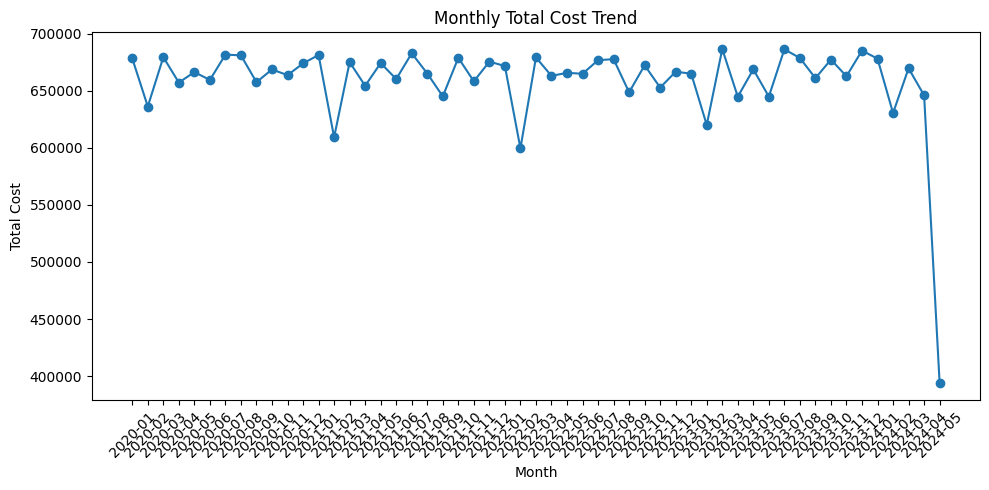

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(retail_grouped1.index.astype(str), retail_grouped1.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Cost')
plt.title('Monthly Total Cost Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### *Inference:*
The line chart above shows the monthly fluctuations in total cost over time. This could be because:
- Seasonal demand shifts.
- Promotions or discounts offered in specific month
- Customer behaviour trend linked to events
- Product availability.

### ***2. Yearly analysis***

In [ ]:
retail['Yearly'] = retail['date'].dt.year

<ipython-input-21-2185285274>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Yearly'] = retail['date'].dt.year


In [ ]:
retail['Yearly']

,Yearly
1,2023
4,2020
5,2021
6,2023
7,2020
...,...
999993,2022
999994,2021
999996,2022
999998,2023


In [ ]:
yearly_retail = retail.groupby('Yearly')['Total_Cost'].sum()

In [ ]:
yearly_retail

,Total_Cost
Yearly,
2020,8003309.85
2021,7960087.34
2022,7938835.85
2023,7981077.57
2024,3017870.98


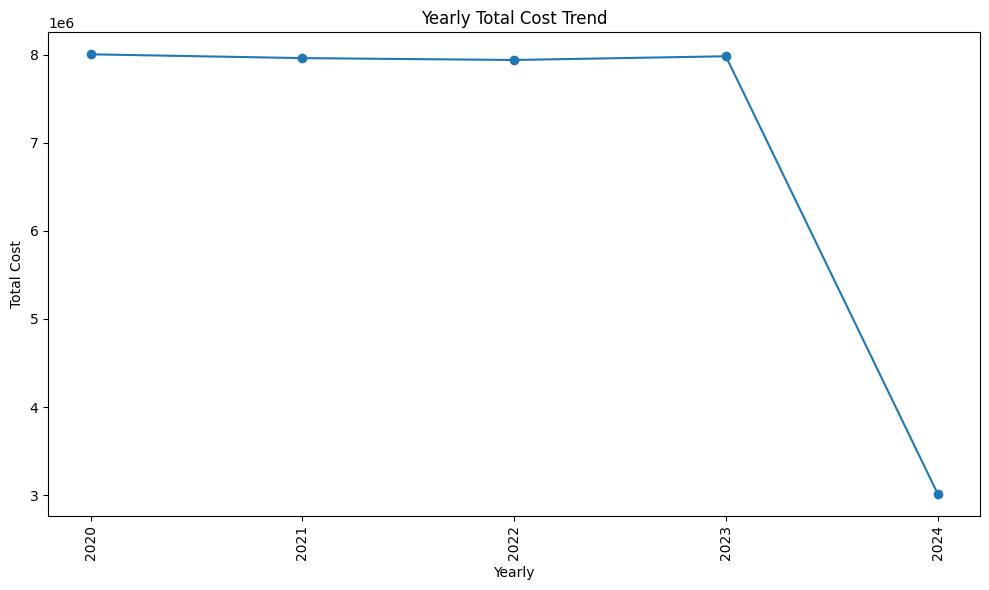

In [ ]:
plt.figure(figsize =(10,6))
plt.plot(yearly_retail.index.astype(str),yearly_retail.values,marker = 'o')
plt.xlabel('Yearly')
plt.ylabel('Total Cost')
plt.title('Yearly Total Cost Trend')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### *Inference:*
The line chart above illustrates the yearly trend in total sales:

From 2020 to 2023, sales remained relatively steady and strong.

However, in 2024, there is a sharp decline, indicating a significant drop in total sales during that year.

### ***Season analysis***

In [ ]:
seasonal_trends = retail.groupby('Season')['Total_Cost'].sum()

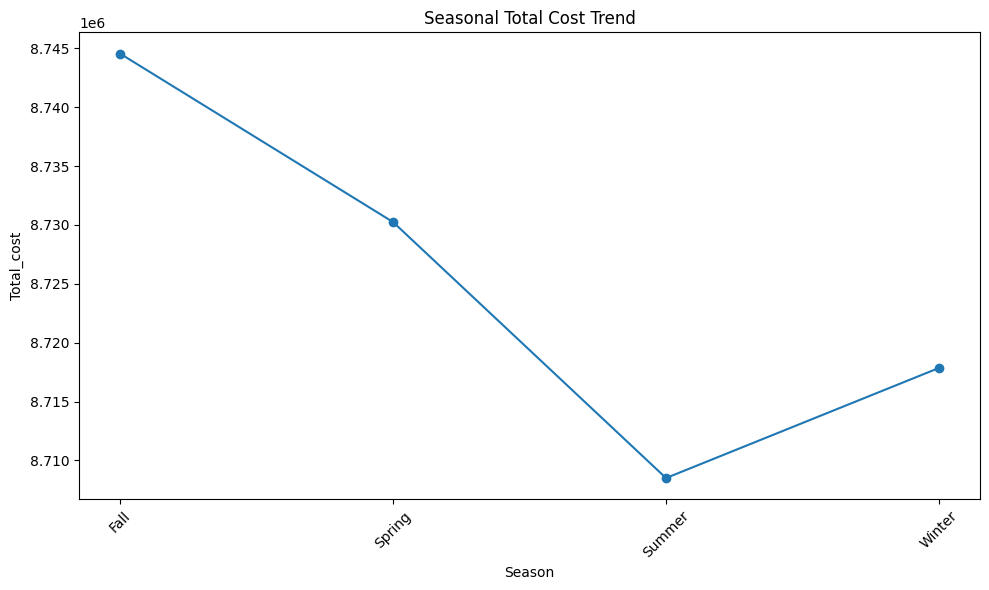

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(seasonal_trends.index.astype(str), seasonal_trends.values, marker = 'o')
plt.xlabel('Season')
plt.ylabel('Total_cost')
plt.title('Seasonal Total Cost Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Inference:
The line chart above illustrates the seasonal trend in total sales:

Sales peaked during Fall, indicating strong consumer activity and high product demand.

In Spring, there was a moderate decline, suggesting a dip in purchasing behavior.

The trend continued with the lowest sales in Summer, reflecting reduced demand.

However, Winter saw a slight recovery, indicating a renewed interest in purchases during that season.

### ***Most common product:***

In [ ]:
#Most common product:
from collections import Counter
product_counter = Counter()
retail['Product'].apply(product_counter.update)
most_common = pd.DataFrame(product_counter.most_common(20), columns = ['Product', 'Count'])

In [ ]:
most_common

,Product,Count
0,Toothpaste,48850
1,Soap,24708
2,Peanut Butter,24699
3,Milk,24681
4,Ice Cream,24666
5,Jam,24639
6,Yogurt,24610
7,Deodorant,24590
8,Soda,24576
9,Baby Wipes,24574


### Inferences:
The table above shows the 20 most common items purchased by the consumer:

- Toothpaste being the most purchased item with over 48850 transaction, indicating its essential and most recurring in demand.
- Items like Peanut butter, Ice cream, Milk, Jam & Yogurt follow closely with each having 24600+ transactions.
- The list also includes both personal care items (e.g., Deodorant, Shaving Cream) and household products (e.g., Cleaning Spray, Baby Wipes, Insect Repellent), suggesting a diverse range of customer needs.

### ***Payment method analysis:***

<Axes: ylabel='count'>

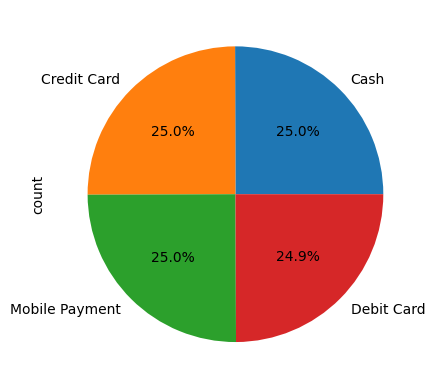

In [ ]:
#payment method
retail['Payment_Method'].value_counts().plot(kind='pie', autopct='%1.1f%%')


### Inferences:
The pie chart illustrates the distribution of payment methods used by customers:

- Credit Card, Cash, and Mobile Payment each account for 25% of the transactions.

- Debit Card slightly trails with 24.9%.

This indicates a diverse customer base with nearly equal preference across different payment modes, showcasing flexibility in payment behavior.

### ***Discount analysis:***

In [ ]:
discount = retail.groupby('Discount_Applied')['Total_Cost'].mean()
discount

,Total_Cost
Discount_Applied,
False,52.372246
True,52.427085



### Inference:
- Discounts were not applied to few products with mean 52.37
- Discounts were applied to few products with mean 52.42



In [ ]:
promotion = retail.groupby('Promotion')['Total_Cost'].mean()
promotion

,Total_Cost
Promotion,
BOGO (Buy One Get One),52.418500
Discount on Selected Items,52.380922


## **RMF Analysis**
Next Step: RFM Analysis
RFM stands for Recency, Frequency, and Monetary.

- Recency – Calculates the number of days since the customer's last purchase.

- Frequency – Measures how often a customer has made purchases.

- Monetary – Calculates the average amount of money spent by the customer.

Why perform RFM analysis?
RFM analysis helps us understand customer behavior and allows us to categorize customers into segments such as:

- Loyal customers

- At-risk/challenging customers

- Churned customers

This segmentation supports targeted marketing and customer retention strategies.

In [ ]:
retail_recency = retail.groupby('Customer ID').agg(last_date = ('date','max')).reset_index()

In [ ]:
max_date = retail['date'].max()
max_date

Timestamp('2024-05-18 00:00:00')

In [ ]:
retail_recency['last_date'] = pd.to_datetime(retail_recency['last_date'])
max_date = pd.to_datetime(max_date)

In [ ]:
retail_recency['Recency'] = (max_date - retail_recency['last_date']).dt.days

In [ ]:
retail_recency

,Customer ID,last_date,Recency
0,0,2021-10-25,936
1,1,2022-02-02,836
2,2,2024-04-15,33
3,3,2020-11-28,1267
4,4,2024-03-23,56
...,...,...,...
262326,262326,2023-08-29,263
262327,262327,2022-03-29,781
262328,262328,2021-04-30,1114
262329,262329,2022-06-15,703


In [ ]:
#Frequency:
freq2 = retail.groupby('Customer ID').date.count().reset_index()

In [ ]:
freq2

,Customer ID,date
0,0,2
1,1,3
2,2,8
3,3,1
4,4,3
...,...,...
262326,262326,2
262327,262327,1
262328,262328,1
262329,262329,1


In [ ]:
freq2.columns = ['Customer ID', 'Frequency']

In [ ]:
freq2['rank_freq'] = freq2['Frequency'].rank(method='max')/freq2['Frequency'].rank(method='max').max()

In [ ]:
freq2

,Customer ID,Frequency,rank_freq
0,0,2,0.759392
1,1,3,0.843027
2,2,8,0.958518
3,3,1,0.579962
4,4,3,0.843027
...,...,...,...
262326,262326,2,0.759392
262327,262327,1,0.579962
262328,262328,1,0.579962
262329,262329,1,0.579962


In [ ]:
#monetary
monet = retail.groupby('Customer ID')['Total_Cost'].sum().reset_index()

In [ ]:
monet.columns = ['Customer ID', 'Monetory']

In [ ]:
monet

,Customer ID,Monetory
0,0,89.80
1,1,215.32
2,2,456.64
3,3,30.30
4,4,116.03
...,...,...
262326,262326,126.80
262327,262327,5.33
262328,262328,21.82
262329,262329,62.07


In [ ]:
retail_recency['rank_recency'] = retail_recency['Recency'].rank()
retail_recency

,Customer ID,last_date,Recency,rank_recency
0,0,2021-10-25,936,189190.5
1,1,2022-02-02,836,175824.0
2,2,2024-04-15,33,12818.0
3,3,2020-11-28,1267,228590.5
4,4,2024-03-23,56,20633.0
...,...,...,...,...
262326,262326,2023-08-29,263,76613.5
262327,262327,2022-03-29,781,168116.5
262328,262328,2021-04-30,1114,211135.0
262329,262329,2022-06-15,703,156591.5


In [ ]:
freq2['rank_freq'] = freq2['rank_freq'].rank(ascending = False)
freq2

,Customer ID,Frequency,rank_freq
0,0,2,86654.5
1,1,3,52149.5
2,2,8,12122.5
3,3,1,186260.5
4,4,3,52149.5
...,...,...,...
262326,262326,2,86654.5
262327,262327,1,186260.5
262328,262328,1,186260.5
262329,262329,1,186260.5


In [ ]:
monet['rank_monetary'] = monet['Monetory'].rank(ascending=False)

In [ ]:
all_data = pd.merge(retail_recency, freq2, on = 'Customer ID')

In [ ]:
all_data = pd.merge(all_data, monet, on='Customer ID')

In [ ]:
all_data

,Customer ID,last_date,Recency,rank_recency,Frequency,rank_freq,Monetory,rank_monetary
0,0,2021-10-25,936,189190.5,2,86654.5,89.80,107814.0
1,1,2022-02-02,836,175824.0,3,52149.5,215.32,35272.0
2,2,2024-04-15,33,12818.0,8,12122.5,456.64,10930.5
3,3,2020-11-28,1267,228590.5,1,186260.5,30.30,220478.0
4,4,2024-03-23,56,20633.0,3,52149.5,116.03,76230.0
...,...,...,...,...,...,...,...,...
262326,262326,2023-08-29,263,76613.5,2,86654.5,126.80,70128.5
262327,262327,2022-03-29,781,168116.5,1,186260.5,5.33,261781.5
262328,262328,2021-04-30,1114,211135.0,1,186260.5,21.82,234842.5
262329,262329,2022-06-15,703,156591.5,1,186260.5,62.07,162811.5


In [ ]:
final = pd.DataFrame(retail_recency['Customer ID'])

In [ ]:
freq2['rank_freq'] = freq2['Frequency'].rank(method = 'average')

In [ ]:
freq2['rank_freq'] = freq2['rank_freq']/freq2['rank_freq'].max()

In [ ]:
bins = [0,0.35,0.75,1]
names = ['1','2','3']

In [ ]:
final = retail_recency[['Customer ID']].copy()  # Make it a DataFrame
final = final.merge(freq2[['Customer ID', 'rank_freq']], on='Customer ID', how='left')

final['Frequency'] = pd.cut(
    final['rank_freq'],
    bins = bins,
    labels = names,
    include_lowest= True
)
print(final[['Customer ID', 'rank_freq']].head(10))

   Customer ID  rank_freq
0            0   0.669679
1            1   0.801211
2            2   0.953793
3            3   0.289983
4            4   0.801211
5            5   0.801211
6            6   0.967977
7            7   0.289983
8            8   0.289983
9            9   0.289983


In [ ]:
final

,Customer ID,rank_freq,Frequency
0,0,0.669679,2
1,1,0.801211,3
2,2,0.953793,3
3,3,0.289983,1
4,4,0.801211,3
...,...,...,...
262326,262326,0.669679,2
262327,262327,0.289983,1
262328,262328,0.289983,1
262329,262329,0.289983,1


In [ ]:
retail_recency.columns

Index(['Customer ID', 'last_date', 'Recency', 'rank_recency'], dtype='object')

In [ ]:
retail_recency


,Customer ID,last_date,Recency,rank_recency
0,0,2021-10-25,936,189190.5
1,1,2022-02-02,836,175824.0
2,2,2024-04-15,33,12818.0
3,3,2020-11-28,1267,228590.5
4,4,2024-03-23,56,20633.0
...,...,...,...,...
262326,262326,2023-08-29,263,76613.5
262327,262327,2022-03-29,781,168116.5
262328,262328,2021-04-30,1114,211135.0
262329,262329,2022-06-15,703,156591.5


In [ ]:
from os import sendfile
retail_recency['rank_recency'] = retail_recency['Recency'].rank(ascending = True)/retail_recency['Recency'].rank(ascending=True).max()

final = final.merge(
    retail_recency[['Customer ID', 'rank_recency']],
    on='Customer ID',
    how='left'
)

# Step 4: Bin Recency
final['Recency'] = pd.cut(
    final['rank_recency'],
    bins=bins,
    labels=names,
    include_lowest=True
)

In [ ]:
monet['rank_monetary'] = monet['Monetory'].rank(ascending= False)/monet['Monetory'].rank(ascending=False).max()

final = final.merge(
    monet[['Customer ID','rank_monetary']],
    on = 'Customer ID',
    how = 'left'
)

final['Monetary'] = pd.cut(
    final['rank_monetary'],
    bins = bins,
    labels = names,
    include_lowest = True
)

In [ ]:
final

,Customer ID,rank_freq,Frequency,rank_recency,Recency,rank_monetary,Monetary
0,0,0.669679,2,0.721311,2,0.410992,2
1,1,0.801211,3,0.670350,2,0.134459,1
2,2,0.953793,3,0.048870,1,0.041668,1
3,3,0.289983,1,0.871528,3,0.840473,3
4,4,0.801211,3,0.078666,1,0.290593,1
...,...,...,...,...,...,...,...
262326,262326,0.669679,2,0.292098,1,0.267333,1
262327,262327,0.289983,1,0.640964,2,0.997924,3
262328,262328,0.289983,1,0.804977,3,0.895232,3
262329,262329,0.289983,1,0.597023,2,0.620646,2


In [ ]:
final.columns

Index(['Customer ID', 'rank_freq', 'Frequency', 'rank_recency', 'Recency',
       'rank_monetary', 'Monetary'],
      dtype='object')

In [ ]:
final.drop(columns = ['rank_freq','rank_monetary'],axis = 1,inplace = True)

In [ ]:
final.drop(columns = 'rank_recency',axis = 1, inplace = True)

In [ ]:
final

,Customer ID,Frequency,Recency,Monetary
0,0,2,2,2
1,1,3,2,1
2,2,3,1,1
3,3,1,3,3
4,4,3,1,1
...,...,...,...,...
262326,262326,2,1,1
262327,262327,1,2,3
262328,262328,1,3,3
262329,262329,1,2,2


In [ ]:
final['rec_freq_mone'] = (
    final['Recency'].astype(str)+
    final['Frequency'].astype(str)+
    final['Monetary'].astype(str)
)

In [ ]:
all_data['rec_freq_monet'] = final['rec_freq_mone']

<ipython-input-70-3008991448>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)


[Text(0, 0, '222'),
 Text(1, 0, '231'),
 Text(2, 0, '131'),
 Text(3, 0, '313'),
 Text(4, 0, '312'),
 Text(5, 0, '213'),
 Text(6, 0, '112'),
 Text(7, 0, '123'),
 Text(8, 0, '121'),
 Text(9, 0, '321'),
 Text(10, 0, '212'),
 Text(11, 0, '221'),
 Text(12, 0, '113'),
 Text(13, 0, '132'),
 Text(14, 0, '122'),
 Text(15, 0, '223'),
 Text(16, 0, '322'),
 Text(17, 0, '232'),
 Text(18, 0, '111'),
 Text(19, 0, '211'),
 Text(20, 0, '323'),
 Text(21, 0, '311'),
 Text(22, 0, '331'),
 Text(23, 0, '233'),
 Text(24, 0, '133'),
 Text(25, 0, '332'),
 Text(26, 0, '333')]

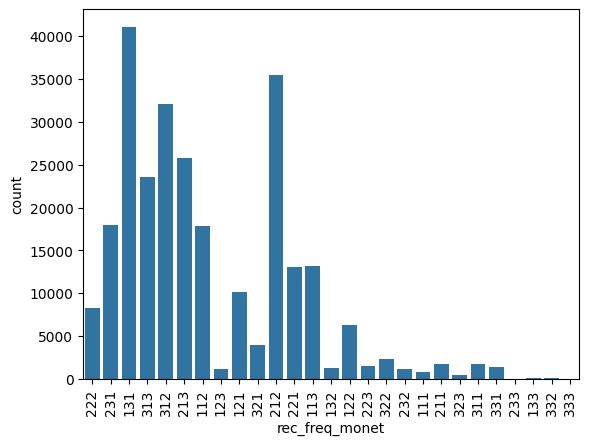

In [ ]:
fig = sns.countplot(x = 'rec_freq_monet', data = all_data)
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)

### Inference:
The bar chart displays the distribution of customers based on their RFM segments (Recency_Frequency_Monetary):

The most common segments are 131, 321, 131, and 312, indicating a large number of customers:

Who have moderate-to-recent purchase recency

Have medium to high frequency

And generally spend at a medium level

Segments like 111, 333, and 133 are sparsely populated, meaning:

Very few customers are both highly active and high-spending, or

Have very low interaction or spending levels.

The dominance of mid-range segments (e.g., 222, 212, 312) suggests that the majority of customers are moderately engaged, offering opportunities to nurture them into loyal customers through targeted promotions or loyalty programs

In [ ]:
all_data

,Customer ID,last_date,Recency,rank_recency,Frequency,rank_freq,Monetory,rank_monetary,rec_freq_monet
0,0,2021-10-25,936,189190.5,2,86654.5,89.80,107814.0,222
1,1,2022-02-02,836,175824.0,3,52149.5,215.32,35272.0,231
2,2,2024-04-15,33,12818.0,8,12122.5,456.64,10930.5,131
3,3,2020-11-28,1267,228590.5,1,186260.5,30.30,220478.0,313
4,4,2024-03-23,56,20633.0,3,52149.5,116.03,76230.0,131
...,...,...,...,...,...,...,...,...,...
262326,262326,2023-08-29,263,76613.5,2,86654.5,126.80,70128.5,121
262327,262327,2022-03-29,781,168116.5,1,186260.5,5.33,261781.5,213
262328,262328,2021-04-30,1114,211135.0,1,186260.5,21.82,234842.5,313
262329,262329,2022-06-15,703,156591.5,1,186260.5,62.07,162811.5,212


## KMeans clustering
In the final step, we will perform K-Means clustering using the RFM (Recency, Frequency, Monetary) data points to gain deeper insights into customer behavior.

This clustering will help us:

Segment customers into distinct groups based on their purchasing patterns.

Identify key customer types such as loyal customers, at-risk customers, and high-value customers.

Tailor marketing strategies and promotional offers for each customer segment.

Improve customer retention by addressing the specific needs of each group.

By visualizing these clusters, we can better understand how customers differ and where to focus our business efforts.



In [ ]:
X = all_data[['Recency','Frequency', 'Monetory']]

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 3, n_init= 10, max_iter= 300, tol = 0.0001)

In [ ]:
fitting = km.fit_predict(X)
fitting

array([1, 1, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
X['Centriod'] = fitting

<ipython-input-75-2883206485>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Centriod'] = fitting


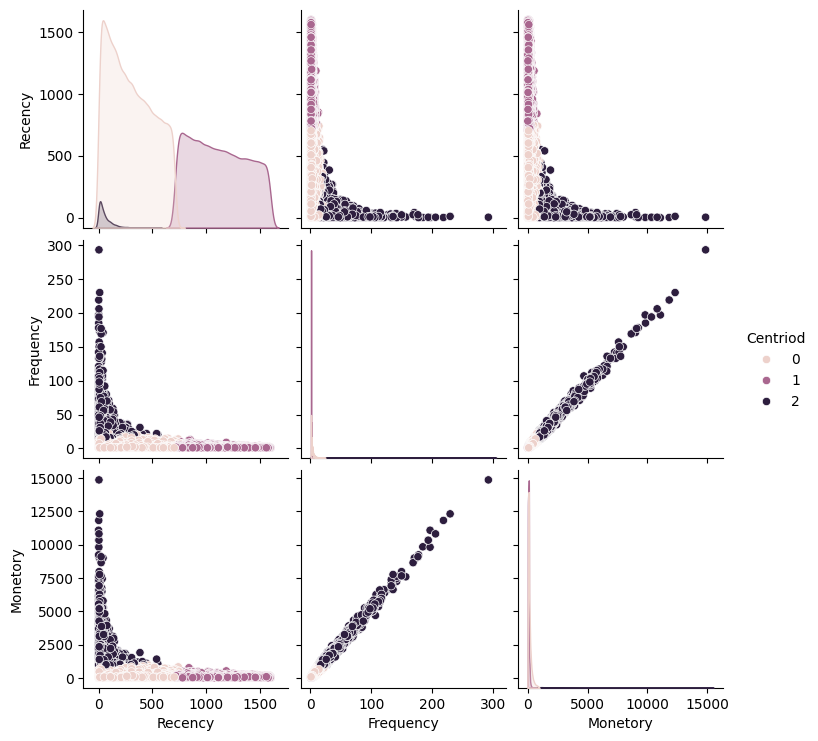

In [ ]:
sns.pairplot(data = X, hue = 'Centriod')

### Inference:

The pairplot visualizes customer segmentation using K-Means clustering on Recency, Frequency, and Monetary values. The data points are divided into three clusters (0, 1, 2):

Cluster 2 (Dark Purple):
These customers have low recency, high frequency, and high monetary value, indicating they are highly active, loyal, and valuable customers. They are prime targets for loyalty rewards and premium services.

Cluster 0 (Light Pink):
Customers in this group show high recency, low frequency, and low spending, suggesting they are inactive or churned customers. These users may need re-engagement campaigns or targeted promotions to return.

Cluster 1 (Medium Purple):
This segment has moderate recency, frequency, and monetary values, indicating occasional or average customers. These users can potentially be nurtured into more frequent or high-value customers with the right offers.

Key Insight:
The segmentation effectively separates customer behavior into actionable groups, allowing the business to tailor strategies for acquisition, retention, and loyalty.

